## Importing required libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import scikitplot as skplt 

## Loading Datasets
Here I have loaded the 'result_balanced.csv' dataset using the pandas library

In [15]:
df = pd.read_csv('data/result_balanced.csv')

In [16]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
0,0,1,35.0,0,0,10.62,3,0,1
1,0,2,18.0,0,0,26.19,3,0,1
2,0,3,25.0,0,0,6.65,3,0,1
3,0,3,51.0,0,0,7.50,3,0,1
4,0,3,6.0,0,0,9.91,3,0,1


In [17]:
df.shape

(84630, 9)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84630 entries, 0 to 84629
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  84630 non-null  int64  
 1   Pclass    84630 non-null  int64  
 2   Age       84630 non-null  float64
 3   SibSp     84630 non-null  int64  
 4   Parch     84630 non-null  int64  
 5   Fare      84630 non-null  float64
 6   Embarked  84630 non-null  int64  
 7   female    84630 non-null  int64  
 8   male      84630 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 5.8 MB


In [19]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,female,male
count,84630.000000,84630.000000,84630.000000,84630.000000,84630.000000,84630.000000,84630.000000,84630.000000,84630.000000
mean,0.500000,2.072114,38.606467,0.374170,0.408827,27.619937,2.644098,0.473922,0.526078
std,0.500003,0.836721,18.094054,0.753597,0.762052,22.864449,0.585223,0.499322,0.499322
min,0.000000,1.000000,0.080000,0.000000,0.000000,0.680000,1.000000,0.000000,0.000000
25%,0.000000,1.000000,25.000000,0.000000,0.000000,10.220000,2.000000,0.000000,0.000000
50%,0.500000,2.000000,39.000000,0.000000,0.000000,22.970000,3.000000,0.000000,1.000000
75%,1.000000,3.000000,53.000000,1.000000,1.000000,31.750000,3.000000,1.000000,1.000000
max,1.000000,3.000000,87.000000,5.000000,4.000000,117.000000,3.000000,1.000000,1.000000


## Prepare set of independent variables and the dependent variable.

In [20]:
X = df.drop('Survived', axis = 1)
y = df['Survived']

## Split the data into Train and Test sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((59241, 8), (59241,), (25389, 8), (25389,))

## Implementing the model 

### 1. Stochastic Gradient Descent Classifier:

#### Hyper Parameter Estimation:

In [28]:
sgd_clf = GridSearchCV(SGDClassifier(),{
    'loss': ['hinge', 'log', 'modified_huber',
             'squared_hinge', 'perceptron', 'squared_loss', 'huber',
            'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'penalty': ['l2','l1', 'elasticnet']},
    cv=3)


sgd_clf.fit(X_train,y_train)
print(sgd_clf.best_params_)

{'loss': 'modified_huber', 'penalty': 'elasticnet'}


##### Running the model:

In [29]:
sgd_clf = SGDClassifier(loss = 'modified_huber', penalty = 'elasticnet')
sgd_clf.fit(X_train,y_train)

SGDClassifier(loss='modified_huber', penalty='elasticnet')

##### Performance of the model:

In [30]:
cross_val_score(sgd_clf,X,y, cv = 3)

array([0.75352712, 0.73902871, 0.7674938 ])

In [32]:
cross_val_score(sgd_clf,X,y).mean()

0.7574264445232187

In [33]:
print(classification_report(y_test,sgd_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76     12718
           1       0.76      0.79      0.77     12671

    accuracy                           0.77     25389
   macro avg       0.77      0.77      0.77     25389
weighted avg       0.77      0.77      0.77     25389



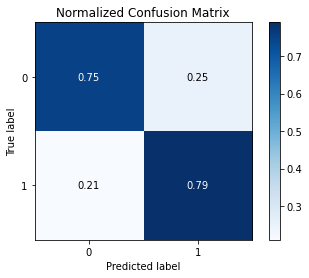

In [34]:
skplt.metrics.plot_confusion_matrix(y_test, sgd_clf.predict(X_test), normalize=True);

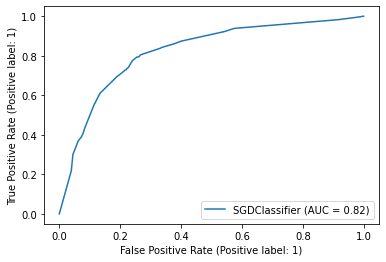

In [35]:
metrics.plot_roc_curve(sgd_clf, X_test, y_test);

### 2. KNN Classifier:

#### Hyper Parameter Estimation:

In [36]:
from sklearn.neighbors import KNeighborsClassifier

In [37]:
knn_clf = GridSearchCV(KNeighborsClassifier(),{
    'n_neighbors': [3,5,10,15],
    'weights': ["uniform", "distance"],
    'algorithm':["auto", "ball_tree", "kd_tree"]},
    cv=3)


knn_clf.fit(X_train,y_train)
print(knn_clf.best_params_)

{'algorithm': 'ball_tree', 'n_neighbors': 15, 'weights': 'uniform'}


##### Running the model:

In [38]:
knn_clf = KNeighborsClassifier(algorithm = 'ball_tree', n_neighbors = 15, weights = 'uniform')
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=15)

##### Performance of the model:

In [39]:
cross_val_score(knn_clf,X,y, cv = 3)

array([0.74533853, 0.7494151 , 0.75225097])

In [40]:
cross_val_score(knn_clf,X,y).mean()

0.7491196975067943

In [41]:
print(classification_report(y_test,knn_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75     12718
           1       0.74      0.77      0.75     12671

    accuracy                           0.75     25389
   macro avg       0.75      0.75      0.75     25389
weighted avg       0.75      0.75      0.75     25389



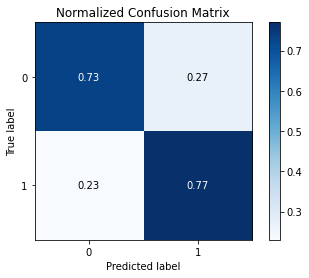

In [42]:
skplt.metrics.plot_confusion_matrix(y_test, knn_clf.predict(X_test), normalize=True);

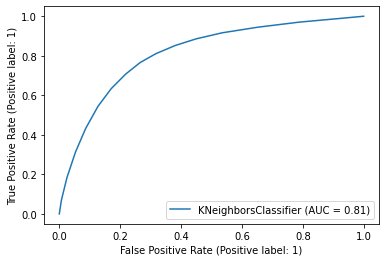

In [43]:
metrics.plot_roc_curve(knn_clf, X_test, y_test);

### Comparision Between two models:

Here we have used two different classifier to predict our outcome. 
From different evaluation parameters we came to know that the accuracy of the SGD classifier is slightly greater than the KNN classifier. So for our work we will use the SGD classifier.